In [1]:
#!unzip project2022.zip

In [2]:
!ls -alh

total 656M
drwxrwsr-x  3 jovyan jovyan 4.0K Jul 29 12:14 .
drwxr-Sr-- 16 jovyan jovyan 4.0K Jul 29 12:12 ..
-rw-rw----  1 jovyan jovyan 106K Oct  7  2022 Board.h
-rwxrwxr-x  1 jovyan jovyan  224 Oct  7  2022 compileMAC.sh
-rwxrwx---  1 jovyan jovyan  150 Oct  7  2022 compile.sh
-rw-rw----  1 jovyan jovyan  16K Oct  7  2022 Game.h
-rw-rw-r--  1 jovyan jovyan 518M Oct  7  2022 games.data
-rw-rw----  1 jovyan jovyan  14K Oct  7  2022 golois.cpp
-rwxrwxr-x  1 jovyan jovyan 242K Oct  7  2022 golois.cpython-310-x86_64-linux-gnu.so
-rwxrwxr-x  1 jovyan jovyan 231K Oct  7  2022 golois.cpython-37m-x86_64-linux-gnu.so
-rwxrwxr-x  1 jovyan jovyan 231K Oct  7  2022 golois.cpython-38-x86_64-linux-gnu.so
-rwxrwxr-x  1 jovyan jovyan 238K Apr  3 16:24 golois.cpython-39-x86_64-linux-gnu.so
-rw-rw-r--  1 jovyan jovyan 2.6K Oct  7  2022 golois.py
-rw-rw-r--  1 jovyan jovyan  20K Oct  7  2022 importGolois.ipynb
drwxrwsr-x  2 jovyan jovyan 4.0K Jul 29 12:14 .ipynb_checkpoints
-rw-rw-r--  1 jovyan jovyan 13

In [3]:
!cat compile.sh

c++ -O3 -Wall -shared -std=c++11 -fsized-deallocation -fPIC `python3 -m pybind11 --includes` golois.cpp -o golois$(python3-config --extension-suffix)


In [4]:
!python --version

Python 3.9.13


In [5]:
!ls -alh /content

ls: cannot access '/content': No such file or directory


In [6]:
!pip install pybind11

  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)


In [7]:
#!c++ -O3 -Wall -shared -std=c++11 -fsized-deallocation -fPIC `python3.10 -m pybind11 --include` golois.cpp -o golois$(python3.10-config --extension-suffix)

In [8]:
!ls -alh *.so

-rwxrwxr-x 1 jovyan jovyan 242K Oct  7  2022 golois.cpython-310-x86_64-linux-gnu.so
-rwxrwxr-x 1 jovyan jovyan 231K Oct  7  2022 golois.cpython-37m-x86_64-linux-gnu.so
-rwxrwxr-x 1 jovyan jovyan 231K Oct  7  2022 golois.cpython-38-x86_64-linux-gnu.so
-rwxrwxr-x 1 jovyan jovyan 238K Apr  3 16:24 golois.cpython-39-x86_64-linux-gnu.so


In [9]:
#!cp golois.cpython-310-x86_64-linux-gnu.so /content/drive/MyDrive/Essai

In [34]:
#! ls -alh /content/drive/MyDrive

# Introduction
In this work, a deep learning model is developed to enable playing the ancient strategic board game of Go. This repository contains two different implementations developed in Python programming language with Keras and TensorFlow enabled for Graphic Processing Unit (GPU) through Saturn.io website:

* A first implementation based on the original Convolutional Neural Network (CNN), finetuned with incremental parameters
* The second provided source-code contains an implementation using MobileNet architecture

I will also provide some graphs to evaluate the performance of the network.

In [10]:
!cat  golois.py

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
import gc

import golois

planes = 31
moves = 361
N = 10000
epochs = 20
batch = 128
filters = 32

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)


input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)
for i in range (5):
    x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
policy_head = 

### 1. Importing libraries and packages

In [11]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import gc #garbage collector, memory management
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.optimizers import Adam
import golois

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

2023-07-29 12:19:29.615817: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


### 2. Training

The model is built using the TensorFlow and Keras libraries, powerful tools for creating and training neural networks. The game board is represented as a 19x19 grid with 31 different planes of input data, capturing various aspects of the game state. 

The goal of the model is twofold: 
* first, to predict the best move to play based on the current game state, and 
* second, to estimate the likelihood of winning the game from the given position. 

The model architecture consists of multiple convolutional layers to capture spatial patterns and relationships on the game board, followed by separate heads for policy prediction (using a softmax activation) and value prediction (using a sigmoid activation). The model is trained with a dataset containing 10,000 game positions, each with corresponding policy and value labels. The training process involves optimizing the model's parameters using stochastic gradient descent with L2 regularization. After 300 epochs of training, our final model is expected to make informed and strategic decisions in playing the game of Go, in order to finetune parameters and boost our performance.

In [21]:
planes = 31 # input data, 31 planes
moves = 361 # size of model output vector
N = 10000 # N samples, training recommendation for better prediction
epochs = 300 # modified to 300
batch = 320 # batch size during training
filters = 32 # number of filters used by the model, default 32

input_data = np.random.randint(2, size=(N, 19, 19, planes)) # Input 31 image planes 19 x 19, 2 outputs
input_data = input_data.astype ('float32') #convert input_data array to float32 type

policy = np.random.randint(moves, size=(N,)) # random policy for the model, vector size 'moves
policy = keras.utils.to_categorical (policy) # Convert integers to binary vectors

value = np.random.randint(2, size=(N,)) #The end array contains random outputs for the model. Each output is a vector of size 2
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2)) # Final layer for our prediction with 2 output nodes
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)

getValidation


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


In [22]:
input = keras.Input(shape=(19, 19, planes), name='board') # Crée un tenseur d'entrée avec la forme (19, 19, planes) et le nom 'board

x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)
#for i in range (5):
#    x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
# Applique une couche de convolution avec filters filtres et un noyau de taille (1x1)
# avec l'activation relu et un padding 'same' sur l'entrée input
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x) #playing HERE
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)

policy_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Activation('softmax', name='policy')(policy_head)
#paramètres ajustables
value_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias = False, kernel_regularizer=regularizers.l2(0.0001))(x)
value_head = layers.Flatten()(value_head)
value_head = layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head = layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head = layers.Dense(80, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)
value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0001))(value_head)

model = keras.Model(inputs=input, outputs=[policy_head, value_head])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_9 (Conv2D)              (None, 19, 19, 32)   1024        ['board[0][0]']                  
                                                                                                  
 conv2d_10 (Conv2D)             (None, 19, 19, 32)   9248        ['conv2d_9[0][0]']               
                                                                                                  
 conv2d_11 (Conv2D)             (None, 19, 19, 32)   9248        ['conv2d_10[0][0]']        

The challenge of our Deep Learning project was to create a network with fewer than 100,000 parameters while achieving high performance. Hereabove, our model contains 98,577.

In [23]:
epochs = 150 # Adjustable parameters, decreased from 200 to 150
optimizer = Adam()
model.compile(optimizer=optimizer,
              loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
              loss_weights={'policy' : 1.0, 'value' : 1.0},
              metrics={'policy': 'categorical_accuracy', 'value': 'mse'})

model_history = {'loss': [], 'policy_loss': [], 'value_loss': [], 'policy_categorical_accuracy': [], 'value_mse': []}

for i in range (1, epochs + 1):
    print ('epoch ' + str (i))
    golois.getBatch (input_data, policy, value, end, groups, i * N)
    history = model.fit(input_data,
                        {'policy': policy, 'value': value},
                        epochs=1, batch_size=batch)
    model_history['loss'].append(history.history['loss'][0])
    model_history['policy_loss'].append(history.history['policy_loss'][0])
    model_history['value_loss'].append(history.history['value_loss'][0])
    model_history['policy_categorical_accuracy'].append(history.history['policy_categorical_accuracy'][0])
    model_history['value_mse'].append(history.history['value_mse'][0])
    if (i % 5 == 0):
        gc.collect ()
    if (i % 20 == 0):
        golois.getValidation (input_data, policy, value, end)
        val = model.evaluate (input_data,
                              [policy, value], verbose = 0, batch_size=batch)
        print ("val =", val)

loss_df = pd.DataFrame(model_history)

epoch 1


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 2s 26ms/step - loss: 6.2351 - policy_loss: 5.5167 - value_loss: 0.6932 - policy_categorical_accuracy: 0.0157 - value_mse: 0.1215
epoch 2


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 5.3331 - policy_loss: 4.6201 - value_loss: 0.6932 - policy_categorical_accuracy: 0.0777 - value_mse: 0.1194
epoch 3


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.8508 - policy_loss: 4.1418 - value_loss: 0.6930 - policy_categorical_accuracy: 0.1386 - value_mse: 0.1204
epoch 4


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.6476 - policy_loss: 3.9415 - value_loss: 0.6930 - policy_categorical_accuracy: 0.1713 - value_mse: 0.1207
epoch 5


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 27ms/step - loss: 4.5721 - policy_loss: 3.8683 - value_loss: 0.6931 - policy_categorical_accuracy: 0.1857 - value_mse: 0.1195
epoch 6


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.4689 - policy_loss: 3.7671 - value_loss: 0.6929 - policy_categorical_accuracy: 0.1895 - value_mse: 0.1179
epoch 7


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.4156 - policy_loss: 3.7150 - value_loss: 0.6931 - policy_categorical_accuracy: 0.1999 - value_mse: 0.1202
epoch 8


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.3370 - policy_loss: 3.6375 - value_loss: 0.6931 - policy_categorical_accuracy: 0.2066 - value_mse: 0.1198
epoch 9


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.2310 - policy_loss: 3.5324 - value_loss: 0.6931 - policy_categorical_accuracy: 0.2230 - value_mse: 0.1190
epoch 10


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.1837 - policy_loss: 3.4859 - value_loss: 0.6930 - policy_categorical_accuracy: 0.2346 - value_mse: 0.1190
epoch 11


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.0823 - policy_loss: 3.3852 - value_loss: 0.6929 - policy_categorical_accuracy: 0.2562 - value_mse: 0.1211
epoch 12


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 4.0364 - policy_loss: 3.3400 - value_loss: 0.6927 - policy_categorical_accuracy: 0.2589 - value_mse: 0.1201
epoch 13


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.9628 - policy_loss: 3.2666 - value_loss: 0.6929 - policy_categorical_accuracy: 0.2650 - value_mse: 0.1190
epoch 14


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.9615 - policy_loss: 3.2656 - value_loss: 0.6931 - policy_categorical_accuracy: 0.2729 - value_mse: 0.1176
epoch 15


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.9500 - policy_loss: 3.2544 - value_loss: 0.6930 - policy_categorical_accuracy: 0.2714 - value_mse: 0.1202
epoch 16


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.8969 - policy_loss: 3.2016 - value_loss: 0.6930 - policy_categorical_accuracy: 0.2761 - value_mse: 0.1182
epoch 17


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 27ms/step - loss: 3.9040 - policy_loss: 3.2090 - value_loss: 0.6929 - policy_categorical_accuracy: 0.2760 - value_mse: 0.1183
epoch 18


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.8583 - policy_loss: 3.1633 - value_loss: 0.6930 - policy_categorical_accuracy: 0.2865 - value_mse: 0.1210
epoch 19


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.8318 - policy_loss: 3.1373 - value_loss: 0.6927 - policy_categorical_accuracy: 0.2895 - value_mse: 0.1173
epoch 20


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7819 - policy_loss: 3.0877 - value_loss: 0.6927 - policy_categorical_accuracy: 0.2906 - value_mse: 0.1204


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.7767457962036133, 3.08211350440979, 0.6931313872337341, 0.2964000105857849, 0.12003909796476364]
epoch 21


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.7994 - policy_loss: 3.1051 - value_loss: 0.6928 - policy_categorical_accuracy: 0.2871 - value_mse: 0.1190
epoch 22


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7808 - policy_loss: 3.0865 - value_loss: 0.6931 - policy_categorical_accuracy: 0.2940 - value_mse: 0.1203
epoch 23


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7706 - policy_loss: 3.0764 - value_loss: 0.6929 - policy_categorical_accuracy: 0.2934 - value_mse: 0.1199
epoch 24


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7589 - policy_loss: 3.0648 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3055 - value_mse: 0.1201
epoch 25


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7561 - policy_loss: 3.0622 - value_loss: 0.6929 - policy_categorical_accuracy: 0.2993 - value_mse: 0.1189
epoch 26


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7505 - policy_loss: 3.0564 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3002 - value_mse: 0.1183
epoch 27


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7118 - policy_loss: 3.0179 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3017 - value_mse: 0.1209
epoch 28


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6839 - policy_loss: 2.9901 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3107 - value_mse: 0.1191
epoch 29


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6969 - policy_loss: 3.0030 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3089 - value_mse: 0.1189
epoch 30


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6234 - policy_loss: 2.9298 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3117 - value_mse: 0.1196
epoch 31


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.7169 - policy_loss: 3.0231 - value_loss: 0.6930 - policy_categorical_accuracy: 0.2961 - value_mse: 0.1183
epoch 32


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6824 - policy_loss: 2.9888 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3111 - value_mse: 0.1184
epoch 33


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6695 - policy_loss: 2.9760 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3100 - value_mse: 0.1184
epoch 34


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6726 - policy_loss: 2.9792 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3059 - value_mse: 0.1197
epoch 35


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6410 - policy_loss: 2.9477 - value_loss: 0.6927 - policy_categorical_accuracy: 0.3175 - value_mse: 0.1180
epoch 36


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6314 - policy_loss: 2.9381 - value_loss: 0.6927 - policy_categorical_accuracy: 0.3195 - value_mse: 0.1203
epoch 37


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6256 - policy_loss: 2.9319 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3193 - value_mse: 0.1203
epoch 38


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6568 - policy_loss: 2.9633 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3101 - value_mse: 0.1204
epoch 39


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6511 - policy_loss: 2.9579 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3098 - value_mse: 0.1192
epoch 40


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6156 - policy_loss: 2.9221 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3169 - value_mse: 0.1171


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.6187093257904053, 2.925220012664795, 0.6930415630340576, 0.3208000063896179, 0.11999422311782837]
epoch 41


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6387 - policy_loss: 2.9454 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3163 - value_mse: 0.1188
epoch 42


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6096 - policy_loss: 2.9163 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3171 - value_mse: 0.1209
epoch 43


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5531 - policy_loss: 2.8597 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3279 - value_mse: 0.1190
epoch 44


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5558 - policy_loss: 2.8623 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3266 - value_mse: 0.1193
epoch 45


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5858 - policy_loss: 2.8926 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3234 - value_mse: 0.1190
epoch 46


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5886 - policy_loss: 2.8953 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3222 - value_mse: 0.1192
epoch 47
 1/32 [..............................] - ETA: 0s - loss: 3.4182 - policy_loss: 2.7243 - value_loss: 0.6935 - policy_categorical_accuracy: 0.3562 - value_mse: 0.1148

r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5633 - policy_loss: 2.8700 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3254 - value_mse: 0.1209
epoch 48


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5758 - policy_loss: 2.8823 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3237 - value_mse: 0.1209
epoch 49


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5558 - policy_loss: 2.8625 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3239 - value_mse: 0.1206
epoch 50


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.5391 - policy_loss: 2.8460 - value_loss: 0.6927 - policy_categorical_accuracy: 0.3354 - value_mse: 0.1204
epoch 51


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5790 - policy_loss: 2.8856 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3228 - value_mse: 0.1214
epoch 52


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.5932 - policy_loss: 2.9001 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3202 - value_mse: 0.1174
epoch 53


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.6089 - policy_loss: 2.9155 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3126 - value_mse: 0.1193
epoch 54


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5677 - policy_loss: 2.8742 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3232 - value_mse: 0.1190
epoch 55


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5888 - policy_loss: 2.8955 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3254 - value_mse: 0.1195
epoch 56


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5546 - policy_loss: 2.8614 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3292 - value_mse: 0.1201
epoch 57


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.5542 - policy_loss: 2.8614 - value_loss: 0.6926 - policy_categorical_accuracy: 0.3259 - value_mse: 0.1211
epoch 58


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5665 - policy_loss: 2.8732 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3233 - value_mse: 0.1199
epoch 59


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5465 - policy_loss: 2.8535 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3321 - value_mse: 0.1199
epoch 60


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5564 - policy_loss: 2.8631 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3251 - value_mse: 0.1197


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.539715528488159, 2.8464059829711914, 0.6930316090583801, 0.3271999955177307, 0.11998918652534485]
epoch 61


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5447 - policy_loss: 2.8516 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3254 - value_mse: 0.1199
epoch 62


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5480 - policy_loss: 2.8547 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3275 - value_mse: 0.1199
epoch 63


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5084 - policy_loss: 2.8150 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3349 - value_mse: 0.1182
epoch 64


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5391 - policy_loss: 2.8460 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3305 - value_mse: 0.1199
epoch 65


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5343 - policy_loss: 2.8409 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3284 - value_mse: 0.1205
epoch 66


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5181 - policy_loss: 2.8249 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3356 - value_mse: 0.1190
epoch 67


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5514 - policy_loss: 2.8582 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3298 - value_mse: 0.1181
epoch 68


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5080 - policy_loss: 2.8148 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3381 - value_mse: 0.1195
epoch 69


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5342 - policy_loss: 2.8412 - value_loss: 0.6927 - policy_categorical_accuracy: 0.3283 - value_mse: 0.1198
epoch 70


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5147 - policy_loss: 2.8217 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3325 - value_mse: 0.1197
epoch 71


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5506 - policy_loss: 2.8573 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3262 - value_mse: 0.1199
epoch 72


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5082 - policy_loss: 2.8150 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3338 - value_mse: 0.1195
epoch 73


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5158 - policy_loss: 2.8226 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3301 - value_mse: 0.1178
epoch 74


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4870 - policy_loss: 2.7939 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3389 - value_mse: 0.1174
epoch 75


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5112 - policy_loss: 2.8178 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3338 - value_mse: 0.1189
epoch 76


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5229 - policy_loss: 2.8298 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3399 - value_mse: 0.1179
epoch 77


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5298 - policy_loss: 2.8365 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3253 - value_mse: 0.1194
epoch 78


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4796 - policy_loss: 2.7862 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3418 - value_mse: 0.1196
epoch 79


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5270 - policy_loss: 2.8339 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3356 - value_mse: 0.1190
epoch 80


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4965 - policy_loss: 2.8035 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3320 - value_mse: 0.1198


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.5157933235168457, 2.8225269317626953, 0.6930311918258667, 0.3303999900817871, 0.11998896300792694]
epoch 81


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5145 - policy_loss: 2.8211 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3333 - value_mse: 0.1187
epoch 82
 1/32 [..............................] - ETA: 0s - loss: 3.4062 - policy_loss: 2.7127 - value_loss: 0.6933 - policy_categorical_accuracy: 0.3438 - value_mse: 0.1247

r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5264 - policy_loss: 2.8332 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3305 - value_mse: 0.1183
epoch 83


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5217 - policy_loss: 2.8283 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3247 - value_mse: 0.1198
epoch 84


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4991 - policy_loss: 2.8060 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3313 - value_mse: 0.1182
epoch 85


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4796 - policy_loss: 2.7863 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3417 - value_mse: 0.1186
epoch 86


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4910 - policy_loss: 2.7979 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3382 - value_mse: 0.1199
epoch 87


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4706 - policy_loss: 2.7776 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3356 - value_mse: 0.1202
epoch 88


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.4607 - policy_loss: 2.7675 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3353 - value_mse: 0.1208
epoch 89


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5185 - policy_loss: 2.8253 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3309 - value_mse: 0.1199
epoch 90


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4694 - policy_loss: 2.7763 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3385 - value_mse: 0.1211
epoch 91


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.5218 - policy_loss: 2.8287 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3330 - value_mse: 0.1201
epoch 92


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 27ms/step - loss: 3.5359 - policy_loss: 2.8427 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3312 - value_mse: 0.1190
epoch 93


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4751 - policy_loss: 2.7821 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3402 - value_mse: 0.1194
epoch 94


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4764 - policy_loss: 2.7834 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3290 - value_mse: 0.1204
epoch 95


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4879 - policy_loss: 2.7947 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3311 - value_mse: 0.1195
epoch 96


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4851 - policy_loss: 2.7921 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3340 - value_mse: 0.1193
epoch 97


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4574 - policy_loss: 2.7643 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3399 - value_mse: 0.1198
epoch 98


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4897 - policy_loss: 2.7967 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3344 - value_mse: 0.1206
epoch 99


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4686 - policy_loss: 2.7756 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3358 - value_mse: 0.1198
epoch 100


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4874 - policy_loss: 2.7940 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3414 - value_mse: 0.1199


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.4577183723449707, 2.764474868774414, 0.6930296421051025, 0.33959999680519104, 0.11998825520277023]
epoch 101


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4582 - policy_loss: 2.7655 - value_loss: 0.6925 - policy_categorical_accuracy: 0.3358 - value_mse: 0.1193
epoch 102


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4709 - policy_loss: 2.7780 - value_loss: 0.6927 - policy_categorical_accuracy: 0.3347 - value_mse: 0.1181
epoch 103


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4345 - policy_loss: 2.7413 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3434 - value_mse: 0.1196
epoch 104


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4548 - policy_loss: 2.7616 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3388 - value_mse: 0.1192
epoch 105


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4688 - policy_loss: 2.7754 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3346 - value_mse: 0.1194
epoch 106


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4567 - policy_loss: 2.7635 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3387 - value_mse: 0.1190
epoch 107


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4486 - policy_loss: 2.7555 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3372 - value_mse: 0.1213
epoch 108


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4508 - policy_loss: 2.7575 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3392 - value_mse: 0.1202
epoch 109


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4966 - policy_loss: 2.8033 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3324 - value_mse: 0.1206
epoch 110
 1/32 [..............................] - ETA: 0s - loss: 3.3831 - policy_loss: 2.6905 - value_loss: 0.6924 - policy_categorical_accuracy: 0.3625 - value_mse: 0.1254

r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4305 - policy_loss: 2.7375 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3489 - value_mse: 0.1193
epoch 111


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4554 - policy_loss: 2.7623 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3354 - value_mse: 0.1168
epoch 112
 1/32 [..............................] - ETA: 0s - loss: 3.3987 - policy_loss: 2.7057 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3344 - value_mse: 0.1090

r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4482 - policy_loss: 2.7552 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3425 - value_mse: 0.1201
epoch 113


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4505 - policy_loss: 2.7574 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3345 - value_mse: 0.1203
epoch 114


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4456 - policy_loss: 2.7526 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3379 - value_mse: 0.1186
epoch 115


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.4609 - policy_loss: 2.7679 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3390 - value_mse: 0.1176
epoch 116


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4151 - policy_loss: 2.7218 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3516 - value_mse: 0.1208
epoch 117


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4407 - policy_loss: 2.7476 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3437 - value_mse: 0.1206
epoch 118


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4726 - policy_loss: 2.7796 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3362 - value_mse: 0.1184
epoch 119


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4501 - policy_loss: 2.7569 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3363 - value_mse: 0.1174
epoch 120


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4316 - policy_loss: 2.7386 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3451 - value_mse: 0.1186


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.4604852199554443, 2.7672500610351562, 0.693031907081604, 0.34200000762939453, 0.11998932808637619]
epoch 121


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4585 - policy_loss: 2.7653 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3457 - value_mse: 0.1191
epoch 122


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 27ms/step - loss: 3.4220 - policy_loss: 2.7292 - value_loss: 0.6926 - policy_categorical_accuracy: 0.3382 - value_mse: 0.1184
epoch 123


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4251 - policy_loss: 2.7318 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3434 - value_mse: 0.1196
epoch 124


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4467 - policy_loss: 2.7536 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3415 - value_mse: 0.1191
epoch 125


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4015 - policy_loss: 2.7082 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3497 - value_mse: 0.1210
epoch 126


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.4469 - policy_loss: 2.7538 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3413 - value_mse: 0.1204
epoch 127


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4149 - policy_loss: 2.7217 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3463 - value_mse: 0.1184
epoch 128


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4033 - policy_loss: 2.7102 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3487 - value_mse: 0.1196
epoch 129


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.4358 - policy_loss: 2.7427 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3478 - value_mse: 0.1193
epoch 130


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4250 - policy_loss: 2.7319 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3471 - value_mse: 0.1208
epoch 131


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.3843 - policy_loss: 2.6912 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3499 - value_mse: 0.1206
epoch 132
 1/32 [..............................] - ETA: 0s - loss: 3.3123 - policy_loss: 2.6192 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3438 - value_mse: 0.1211

r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4544 - policy_loss: 2.7613 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3381 - value_mse: 0.1200
epoch 133


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4202 - policy_loss: 2.7271 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3449 - value_mse: 0.1191
epoch 134


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4312 - policy_loss: 2.7384 - value_loss: 0.6926 - policy_categorical_accuracy: 0.3436 - value_mse: 0.1179
epoch 135


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4151 - policy_loss: 2.7219 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3424 - value_mse: 0.1189
epoch 136


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4152 - policy_loss: 2.7222 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3455 - value_mse: 0.1187
epoch 137


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.3873 - policy_loss: 2.6941 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3526 - value_mse: 0.1174
epoch 138


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4074 - policy_loss: 2.7146 - value_loss: 0.6926 - policy_categorical_accuracy: 0.3406 - value_mse: 0.1188
epoch 139


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4168 - policy_loss: 2.7237 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3457 - value_mse: 0.1194
epoch 140


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.3752 - policy_loss: 2.6818 - value_loss: 0.6932 - policy_categorical_accuracy: 0.3621 - value_mse: 0.1206


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.388002395629883, 2.6947929859161377, 0.6930181384086609, 0.3513999879360199, 0.11998248100280762]
epoch 141


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4015 - policy_loss: 2.7082 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3489 - value_mse: 0.1209
epoch 142


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4145 - policy_loss: 2.7213 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3435 - value_mse: 0.1209
epoch 143


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 25ms/step - loss: 3.4226 - policy_loss: 2.7293 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3397 - value_mse: 0.1196
epoch 144


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4207 - policy_loss: 2.7277 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3443 - value_mse: 0.1202
epoch 145


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.3822 - policy_loss: 2.6888 - value_loss: 0.6931 - policy_categorical_accuracy: 0.3523 - value_mse: 0.1190
epoch 146


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4103 - policy_loss: 2.7173 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3480 - value_mse: 0.1206
epoch 147


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4150 - policy_loss: 2.7218 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3470 - value_mse: 0.1209
epoch 148


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.3681 - policy_loss: 2.6749 - value_loss: 0.6929 - policy_categorical_accuracy: 0.3549 - value_mse: 0.1187
epoch 149


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4311 - policy_loss: 2.7379 - value_loss: 0.6930 - policy_categorical_accuracy: 0.3430 - value_mse: 0.1198
epoch 150


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


32/32 [==============================] - 1s 26ms/step - loss: 3.4423 - policy_loss: 2.7493 - value_loss: 0.6928 - policy_categorical_accuracy: 0.3460 - value_mse: 0.1197


### 3. Training and Validation loss
The following plots depict the training and validation accuracy and loss resulting from the training process of the first model:

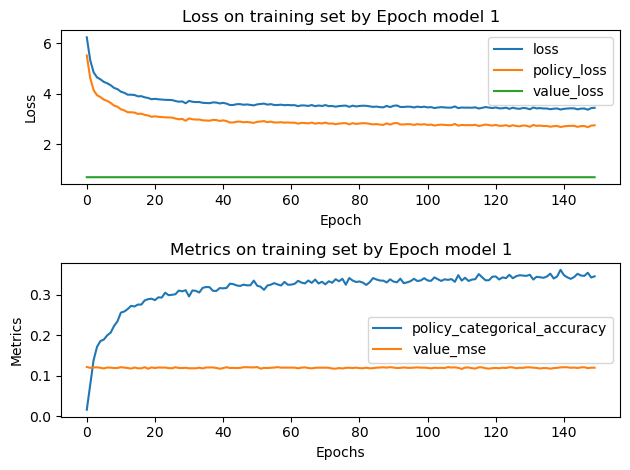

In [24]:
# Display of the loss in a first plot
plt.subplot(2, 1, 1)
plt.plot(loss_df['loss'], label='loss')
plt.plot(loss_df['policy_loss'], label='policy_loss')
plt.plot(loss_df['value_loss'], label='value_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss') 
plt.title('Loss on training set by Epoch model 1')
plt.legend()

# Display of the metrics in a second plot
plt.subplot(2, 1, 2)
plt.plot(loss_df['policy_categorical_accuracy'], label='policy_categorical_accuracy')
plt.plot(loss_df['value_mse'], label='value_mse')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Metrics on training set by Epoch model 1')
plt.legend()

plt.tight_layout()
plt.show()

 The network stabilizes after 60 epochs as can be seen in the below plots from the losses metrics. The values of these parameters all improve over time, indicating that the model is learning and improving at the game of Go. The policy categorical accuracy increases the most, indicating that the model is becoming better at predicting the right move.

**Notes** 
* Loss: this is the overall measure of the model's performance. A lower loss indicates that the model predicts the correct output better.
* Policy categorical accuracy: 0,346 This is the accuracy of the model's policy predictions. A higher accuracy indicates that the model is more likely to predict the correct action.
* MSE value: This is the mean square error of the model's predictions for the value. A lower MSE indicates that the model is more accurate in predicting the value of the plateau state. In our case, MSE value is suprisingly static.

### Evaluation 1

In [25]:
model.history.history

{'loss': [3.4422616958618164],
 'policy_loss': [2.74926495552063],
 'value_loss': [0.6928097009658813],
 'policy_categorical_accuracy': [0.34599998593330383],
 'value_mse': [0.11969582736492157]}

In [19]:
loss = model_history['loss']

In [20]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import seaborn as sns

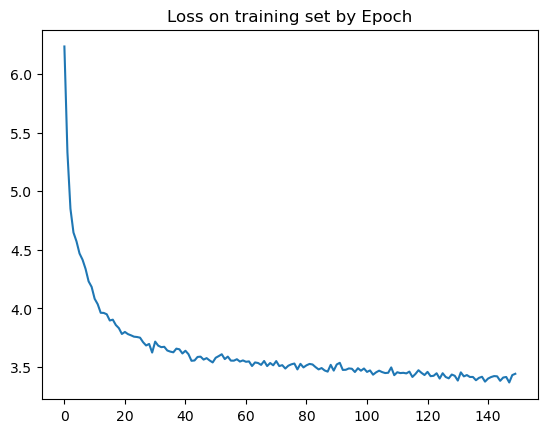

In [30]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Loss on training set by Epoch");

Hereabove, the network stabilizes after 150 epochs as can be seen in the above plot, so we should likely readjust our model to the correct number of epochs (done).

After recalibrating the model, we confirm that a stabilization occurs around 60 epochs.

#### Saving first model

In [28]:
model.save ('WidedLabanne_modelV8.h5')

# Mobilnets
In this final section, we'll use MobileNets using TensorFlow's Keras API, a class of deep convolutional neural networks that are much smaller in size and faster in performance than many other popular models.

MobileNet is a lightweight and efficient neural network architecture that is designed for mobile and embedded vision applications. The model consists of bottleneck blocks and SE (Squeeze-and-Excitation) blocks, which are used to improve the efficiency and performance of the network.

Overall, the model aims to efficiently process the input game board data, make informed predictions about the next move (policy), and estimate the probability of winning the game from the current position (value). 

In [31]:
from keras import backend as K
import timeit

In [45]:
planes = 31
moves = 361
N = 10000
epochs = 300
batch = 128
filters = 64 # Increasing the number of filters to adjust parameters

input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

end = np.random.randint(2, size=(N, 19, 19, 2))
end = end.astype ('float32')

groups = np.zeros((N, 19, 19, 1))
groups = groups.astype ('float32')

print ("getValidation", flush = True)
golois.getValidation (input_data, policy, value, end)

getValidation


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


In [55]:
def SE_Block(t, filters, ratio = 16):
    se_shape = (1, 1, filters)
    se = layers.GlobalAveragePooling2D()(t)
    se = layers.Reshape(se_shape)(se)
    se = layers.Dense(filters // ratio, activation='relu', use_bias=False)(se)
    se = layers.Dense(filters, activation='sigmoid', use_bias=False)(se)
    x = layers.multiply([t, se])
    return x

def bottleneck_block(x, expand = 4 * filters, squeeze=filters):
    m = layers.Conv2D(expand, (1,1), kernel_regularizer=regularizers.l2(0.0001), use_bias=False)(x)
    m = layers.BatchNormalization()(m)
    m = layers.Activation('relu')(m)

    m = layers.DepthwiseConv2D((3,3), padding='same', kernel_regularizer=regularizers.l2(0.0001), use_bias=False)(m)
    m = layers.BatchNormalization()(m)
    m = layers.Activation('relu')(m)

    m = layers.Conv2D(squeeze, (1,1), kernel_regularizer=regularizers.l2(0.0001), use_bias=False)(m)
    m = layers.BatchNormalization()(m)

    x = SE_Block(x, filters)
    return layers.Add()([m, x])

input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(filters, 1, activation='relu', padding='same')(input)


# Adjusting the number of bottleneck blocks and filters to reduce parameters
for i in range(4):  # Using 7 bottleneck blocks
    x = bottleneck_block(x, expand=2*filters, squeeze=filters)

policy_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Activation('softmax', name='policy')(policy_head)

value_head = layers.Conv2D(1, 1, activation='relu', padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
value_head = layers.Flatten()(value_head)
value_head = layers.Dense(56, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(value_head)  # Increase dense units
value_head = layers.Dense(1, activation='sigmoid', name='value', kernel_regularizer=regularizers.l2(0.0001))(value_head)

model_2 = keras.Model(inputs=input, outputs=[policy_head, value_head])
model_2.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 board (InputLayer)             [(None, 19, 19, 31)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_272 (Conv2D)            (None, 19, 19, 64)   2048        ['board[0][0]']                  
                                                                                                  
 conv2d_273 (Conv2D)            (None, 19, 19, 128)  8192        ['conv2d_272[0][0]']             
                                                                                                  
 batch_normalization_282 (Batch  (None, 19, 19, 128)  512        ['conv2d_273[0][0]']      

#### Compilation of Mobilnet Model

In [56]:
optimizer = keras.optimizers.Adam()  # Using Adam optimizer

model_2.compile(
    optimizer=optimizer,
    loss={'policy': 'categorical_crossentropy', 'value': 'binary_crossentropy'},
    loss_weights={'policy': 1.0, 'value': 1.0},
    metrics={'policy': 'categorical_accuracy', 'value': 'mse'}
)

#### Mobilnet Training

In [57]:
import timeit

# Your model and data preparation code goes here...

# Initialize the learning rate
K.set_value(model_2.optimizer.learning_rate, 0.0005)

# Create an empty DataFrame to store the metrics
loss_df2 = pd.DataFrame(columns=['epoch', 'loss', 'policy_loss', 'value_loss', 'policy_categorical_accuracy', 'value_mse'])

start = timeit.default_timer()

for i in range(1, epochs + 1):
    # Adjust learning rate at specific epochs
    if i == 351:
        K.set_value(model_2.optimizer.learning_rate, 0.00005)
    elif i == 401:
        K.set_value(model_2.optimizer.learning_rate, 0.000005)
    elif i == 451:
        K.set_value(model_2.optimizer.learning_rate, 0.0000005)

    print('epoch ' + str(i))
    print(optimizer.lr)

    # Assuming the getBatch function is defined and working properly
    golois.getBatch(input_data, policy, value, end, groups, i * N)

    # Train the model for one epoch
    history = model_2.fit(input_data, {'policy': policy, 'value': value},
                          epochs=1, batch_size=batch, verbose=0)

    if i % 5 == 0:
        gc.collect()

    if i % 20 == 0:
        golois.getValidation(input_data, policy, value, end)
        val = model_2.evaluate(input_data, [policy, value], verbose=0, batch_size=batch)
        print("val =", val)

    # Collect training metrics in df2
    loss_df2 = loss_df2.append({
        'epoch': i,
        'loss': history.history['loss'][0],
        'policy_loss': history.history['policy_loss'][0],
        'value_loss': history.history['value_loss'][0],
        'policy_categorical_accuracy': history.history['policy_categorical_accuracy'][0],
        'value_mse': history.history['value_mse'][0]
    }, ignore_index=True)

end = timeit.default_timer()
print('Time taken:', end - start)


epoch 1
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 2
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 3
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 4
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 5
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 6
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 7
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 8
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 9
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 10
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 11
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 12
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 13
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 14
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 15
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 16
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 17
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 18
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 19
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 20
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.705714464187622, 2.9414923191070557, 0.6897391676902771, 0.32100000977516174, 0.11834804713726044]
epoch 21
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 22
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 23
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 24
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 25
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 26
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 27
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 28
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 29
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 30
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 31
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 32
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 33
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 34
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 35
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 36
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 37
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 38
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 39
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 40
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.5100796222686768, 2.7514877319335938, 0.6881734132766724, 0.3481999933719635, 0.11756918579339981]
epoch 41
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 42
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 43
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 44
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 45
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 46
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 47
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 48
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 49
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 50
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 51
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 52
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 53
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 54
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 55
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 56
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 57
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 58
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 59
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 60
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.4327003955841064, 2.6780056953430176, 0.687516987323761, 0.3497999906539917, 0.11724580079317093]
epoch 61
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 62
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 63
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 64
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 65
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 66
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 67
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 68
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 69
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 70
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 71
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 72
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 73
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 74
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 75
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 76
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 77
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 78
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 79
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 80
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.405914783477783, 2.6534371376037598, 0.6876313090324402, 0.35659998655319214, 0.11729227006435394]
epoch 81
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 82
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 83
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 84
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 85
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 86
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 87
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 88
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 89
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 90
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 91
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 92
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 93
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 94
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 95
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 96
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 97
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 98
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 99
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 100
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.342735528945923, 2.5927984714508057, 0.6869094967842102, 0.3621000051498413, 0.11693765968084335]
epoch 101
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 102
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 103
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 104
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 105
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 106
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 107
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 108
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 109
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 110
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 111
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 112
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 113
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 114
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 115
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 116
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 117
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 118
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 119
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 120
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.341832399368286, 2.5934641361236572, 0.6868970394134521, 0.36480000615119934, 0.11693267524242401]
epoch 121
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 122
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 123
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 124
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 125
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 126
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 127
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 128
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 129
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 130
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 131
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 132
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 133
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 134
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 135
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 136
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 137
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 138
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 139
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 140
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.2773854732513428, 2.5303170680999756, 0.6868569850921631, 0.37299999594688416, 0.11690972000360489]
epoch 141
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 142
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 143
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 144
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 145
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 146
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 147
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 148
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 149
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 150
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 151
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 152
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 153
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 154
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 155
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 156
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 157
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 158
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 159
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 160
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.276982069015503, 2.530210018157959, 0.6876659393310547, 0.3702000081539154, 0.11731629818677902]
epoch 161
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 162
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 163
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 164
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 165
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 166
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 167
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 168
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 169
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 170
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 171
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 172
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 173
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 174
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 175
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 176
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 177
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 178
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 179
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 180
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.246751546859741, 2.501307249069214, 0.6872535347938538, 0.3781999945640564, 0.11710617691278458]
epoch 181
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 182
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 183
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 184
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 185
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 186
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 187
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 188
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 189
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 190
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 191
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 192
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 193
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 194
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 195
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 196
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 197
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 198
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 199
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 200
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.246943712234497, 2.50179123878479, 0.6877927184104919, 0.376800000667572, 0.11737789213657379]
epoch 201
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 202
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 203
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 204
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 205
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 206
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 207
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 208
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 209
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 210
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 211
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 212
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 213
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 214
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 215
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 216
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 217
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 218
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 219
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 220
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.2061657905578613, 2.4628429412841797, 0.6867809295654297, 0.38260000944137573, 0.11687508225440979]
epoch 221
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 222
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 223
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 224
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 225
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 226
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 227
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 228
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 229
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 230
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 231
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 232
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 233
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 234
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 235
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 236
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 237
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 238
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 239
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 240
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.201824426651001, 2.458033561706543, 0.6879175901412964, 0.3837999999523163, 0.11742433905601501]
epoch 241
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 242
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 243
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 244
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 245
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 246
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 247
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 248
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 249
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 250
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 251
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 252
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 253
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 254
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 255
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 256
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 257
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 258
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 259
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 260
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.204387664794922, 2.4625132083892822, 0.6866248250007629, 0.38600000739097595, 0.11679687350988388]
epoch 261
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 262
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 263
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 264
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 265
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 266
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 267
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 268
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 269
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 270
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 271
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 272
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 273
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 274
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 275
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 276
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 277
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)


epoch 278
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 279
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 280
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.1827542781829834, 2.4416263103485107, 0.68641197681427, 0.3864000141620636, 0.11668980866670609]
epoch 281
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 282
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 283
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 284
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 285
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 286
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 287
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 288
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 289
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 290
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 291
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 292
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 293
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 294
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 295
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 296
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 297
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 298
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


epoch 299
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000
/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({
r.shape = (10000, 19, 19, 31)
nbExamples = 10000


epoch 300
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


r.shape = (10000, 19, 19, 31)
nbExamples = 10000


val = [3.1638996601104736, 2.423398494720459, 0.6862534880638123, 0.3887999951839447, 0.11661286652088165]
Time taken: 1662.7761128309994


/tmp/ipykernel_108/1067138075.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loss_df2 = loss_df2.append({


### Collection of Mobilnet metrics

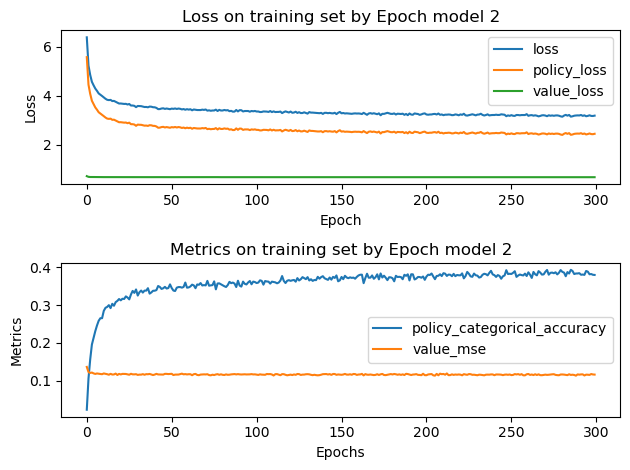

In [58]:
# The loss of my second model in a first plot
plt.subplot(2, 1, 1)
plt.plot(loss_df2['loss'], label='loss')
plt.plot(loss_df2['policy_loss'], label='policy_loss')
plt.plot(loss_df2['value_loss'], label='value_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss on training set by Epoch model 2')
plt.legend()

# Its metrics in a second plot
plt.subplot(2, 1, 2)
plt.plot(loss_df2['policy_categorical_accuracy'], label='policy_categorical_accuracy')
plt.plot(loss_df2['value_mse'], label='value_mse')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Metrics on training set by Epoch model 2')
plt.legend()

plt.tight_layout()
plt.show()

 The network stabilizes as well after 50 epochs as can be seen in the below plots from the losses metrics. The values of these parameters all improve over time, indicating that the model is learning and improving at the game of Go. The policy categorical accuracy increases the most, indicating that the model is becoming better at predicting the right move. The MSE value stabilizes very fast on first epochs.

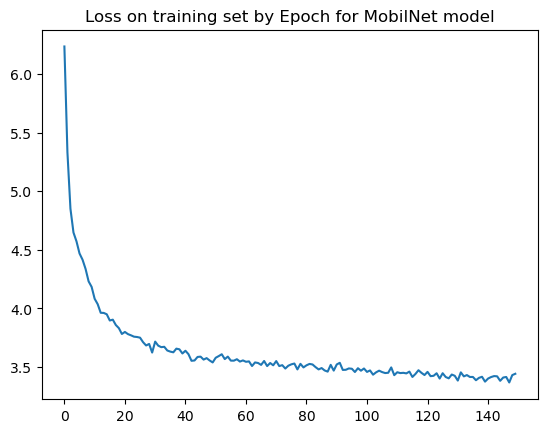

In [59]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Loss on training set by Epoch for MobilNet model");

Hereabove, the Mobilnetwork network stabilizes as well around 140 epochs as can be seen in the above plot, so we should likely readjust our model to the correct number of epochs to 150.

## Saving Mobilnet Model

In [28]:
 #model_2.save ('WidedLabanne_modelMN_V9')

## Conclusion
n this notebook, we explored the process of training a convolutional neural network to play the game of Go. We used https://saturncloud.io/ to benefit from the GPU needed to train our different models, taking advantage of 30 hours of GPU per month for free. Overall, our metrics suggest that the first model learns and improves with the game. The metrics on the second Mobilenet model are broadly similar to the first one.

However, it is important to continue training the model to see if it can continue to improve, particularly in tournament play.

You may be wondering why so much effort goes into solving a board game. Although it doesn't seem to have any immediate practical applications, research in this area aims to advance our collective knowledge. Games such as Go provide a clear measure of progress, and the knowledge gained can be applied to greater challenges. DeepMind, for example, is using its models to save energy, identify diseases and accelerate scientific research worldwide.

This kind of research is key to advancing our understanding of AI and is likely to act as a catalyst for many life-changing technologies in the future.